# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The data has a relatively high variability, given the large standard deviation compared to the mean.  If the standard deviation is too high, it can make it challenging to predict or estimate future charges accurately. This variability can increase the risk for insurance companies, potentially leading to higher premiums for everyone.

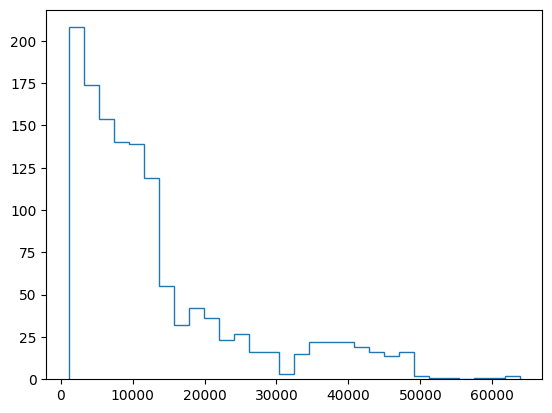

In [4]:
_ = plt.hist(x=medical["charges"], bins=30, histtype="step")

In [5]:
charges_mean = np.mean(medical["charges"])
print(charges_mean)

13270.422265141257


In [6]:
charges_std = np.std(medical["charges"])
print(charges_std)

12105.484975561612


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

In [7]:
medical["charges"].count()

1338

In [8]:
# Degrees of freedom (df) = n - 1 = 1338 - 1 = 1337.

df = 1337

# Confidence level (alpha)
alpha = 0.05

# Calculate the critical t-value
critical_t_value = t.ppf(1 - alpha, df)
print(critical_t_value)

# standard_error = Standard deviation / sqrt(n) 
standard_error = np.std(medical["charges"]) / np.sqrt(1337)
print(standard_error)

# Margin of error = Critical t-value * Standard error 
margin_of_error = critical_t_value * standard_error
print(margin_of_error)

# Lower bound of the one-sided 95% confidence interval = Sample mean - Margin of error 
lower_95 = charges_mean - margin_of_error
print(lower_95)

1.645994114557132
331.0674543156825
544.9350813250255
12725.48718381623


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null Hypothesis (H0): There is no difference in the mean medical charges between people with insurance and people without insurance.
Alternative Hypothesis (H1): There is a difference in the mean medical charges between people with insurance and people without insurance.

The formula provided for the t-test statistic assumes that the variances of the two groups are equal. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__  The t-statistic obtained from both approaches (manual and scipy.stats) is positive, indicating that the mean medical charges for uninsured individuals are higher than those for insured individuals. The absolute magnitude of the t-statistic (12.053781267924437) is large, indicating a significant difference between the means of the two groups. The p-value (7.773875419275704e-32) associated with the t-statistic will be very small, indicating strong evidence against the null hypothesis and suggesting that the difference in means is unlikely to be due to random chance.


In [9]:
# Manual version
# Sample data: mean, standard deviation, sample size
insured = medical[medical["insuranceclaim"] == 1]
mean_insured = np.mean(insured["charges"])
std_insured = np.std(insured["charges"])
n_insured = insured.shape[0]

uninsured = medical[medical["insuranceclaim"] == 0]
mean_uninsured = np.mean(uninsured["charges"])
std_uninsured = np.std(uninsured["charges"])
n_uninsured = uninsured.shape[0]

# Calculate pooled standard deviation
sp = np.sqrt(((n_insured - 1) * std_insured ** 2 + (n_uninsured - 1) * std_uninsured ** 2) / (n_insured + n_uninsured - 2))
print(mean_insured)
print(mean_uninsured)
print(n_insured)
print(n_uninsured)
print(sp)

16423.928276537677
8821.421892306305
783
555
11512.282899205748


In [10]:
t_statistic = (mean_insured - mean_uninsured) / (sp * np.sqrt(1 / n_insured + 1 / n_uninsured))
print(t_statistic)

11.901306943555388


In [17]:
## how to calculate p-value manually??


In [13]:
# Scipy version 
from scipy.stats import ttest_ind

# Perform t-test
t_statistic_scipy, p_value_scipy = ttest_ind(np.random.normal(mean_insured, std_insured, n_insured),
                                              np.random.normal(mean_uninsured, std_uninsured, n_uninsured),
                                              equal_var=True)

print("scipy.stats approach - t-statistic:", t_statistic_scipy)
print("scipy.stats approach - p-value:", p_value_scipy)

scipy.stats approach - t-statistic: 12.053781267924437
scipy.stats approach - p-value: 7.773875419275704e-32


A: While manual and scipy results were not exactly the same, the numerical differences were likely a result of rounding between steps the manual approach, while scipy is more precise.  

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ In scipy.stats, there isn't a specific function for performing a z-test from a sample like there is for the t-test. This is because the z-test is typically used when you have a large sample size (usually greater than 30) and know the population standard deviation.

For large sample sizes, the t-distribution approaches the standard normal (z) distribution, and therefore, the z-test and the t-test produce similar results. As a result, you can often use the t-test function with large sample sizes and known population standard deviation to conduct a z-test effectively.

However, if you specifically need to perform a z-test and have access to the population standard deviation, you can calculate the z-score manually and use the cumulative distribution function (CDF) of the standard normal distribution (scipy.stats.norm.cdf) to calculate the p-value.


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test